In [1]:
import numpy as np
import pandas as pd
import nltk
nltk.download("wordnet")
from nltk.corpus import wordnet
import re
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to C:\Users\Wan
[nltk_data]     Hee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#import empatheticPersonas dataset
data = pd.read_csv('/home/wanhee/SATbot2.0/model/emotion_data/my_empatheticPersonasTW.csv', encoding='utf-8') #put dataset in Drive root folder or change path

In [3]:
#extract sad patient response columns
sad_df = data[['唔開心- 患者反應1', '唔開心- 患者反應2', '唔開心- 患者反應3']]

In [4]:
#extract each column as series
sad1 = sad_df['唔開心- 患者反應1']
sad2 = sad_df['唔開心- 患者反應2']
sad3 = sad_df['唔開心- 患者反應3']

In [5]:
#concatenate series
sad12 = sad1.append(sad2)
sad = sad12.append(sad3)

C:\Users\Wan Hee\AppData\Local\Temp\ipykernel_7280\1034635182.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sad12 = sad1.append(sad2)
C:\Users\Wan Hee\AppData\Local\Temp\ipykernel_7280\1034635182.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sad = sad12.append(sad3)


In [6]:
#convert result to dataframe and drop rows with null values
sad_df = sad.to_frame()
sad_df = sad_df.dropna()

In [7]:
#insert class column with all values set to sadness and rename columns
sad_df.insert(1, 'class', '唔開心')
sad_df.columns = ['text', 'class']

# Angry

In [8]:
#extract angry patient response columns
angry_df = data[['嬲- 患者反應1', '嬲- 患者反應2', '嬲- 患者反應3']]

In [9]:
#extract each angry column as series
angry1 = angry_df['嬲- 患者反應1']
angry2 = angry_df['嬲- 患者反應2']
angry3 = angry_df['嬲- 患者反應3']

In [10]:
#concatenate series
angry12 = angry1.append(angry2)
angry = angry12.append(angry3)

C:\Users\Wan Hee\AppData\Local\Temp\ipykernel_7280\2132024037.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  angry12 = angry1.append(angry2)
C:\Users\Wan Hee\AppData\Local\Temp\ipykernel_7280\2132024037.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  angry = angry12.append(angry3)


In [11]:

#convert angry series to dataframe and drop rows with null values
angry_df = angry.to_frame()
angry_df = angry_df.dropna()

In [12]:
#insert class column with all values set to anger and rename columns
angry_df.insert(1, 'class', '嬲')
angry_df.columns = ['text', 'class']

# Anxious

In [13]:
#extract anxious/fearful patient response columns
fearful_df = data[['擔心- 患者反應1', '擔心- 患者反應2', '擔心- 患者反應3']]


In [14]:
#extract each fearful column as series
fearful1 = fearful_df['擔心- 患者反應1']
fearful2 = fearful_df['擔心- 患者反應2']
fearful3 = fearful_df['擔心- 患者反應3']


In [15]:
#concatenate series
fearful12 = fearful1.append(fearful2)
fearful = fearful12.append(fearful3)

C:\Users\Wan Hee\AppData\Local\Temp\ipykernel_7280\1005300024.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fearful12 = fearful1.append(fearful2)
C:\Users\Wan Hee\AppData\Local\Temp\ipykernel_7280\1005300024.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fearful = fearful12.append(fearful3)


In [16]:
#convert fearful series to dataframe and drop rows with null values
fearful_df = fearful.to_frame()
fearful_df = fearful_df.dropna()

In [17]:
#insert class column with all values set to fear and rename columns
fearful_df.insert(1, 'class', '擔心')
fearful_df.columns = ['text', 'class']

# Happy

In [18]:
#extract happy patient response columns
happy_df = data[['開心- 患者反應1', '開心- 患者反應2', '開心- 患者反應3']]

In [19]:
#extract each happy column as series
happy1 = happy_df['開心- 患者反應1']
happy2 = happy_df['開心- 患者反應2']
happy3 = happy_df['開心- 患者反應3']

In [20]:
#concatenate series
happy12 = happy1.append(happy2)
happy = happy12.append(happy3)

C:\Users\Wan Hee\AppData\Local\Temp\ipykernel_7280\1138037813.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  happy12 = happy1.append(happy2)
C:\Users\Wan Hee\AppData\Local\Temp\ipykernel_7280\1138037813.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  happy = happy12.append(happy3)


In [21]:
#convert happy series to dataframe and drop rows with null values
happy_df = happy.to_frame()
happy_df = happy_df.dropna()

In [22]:
#insert class column with all values set to joy and rename columns
happy_df.insert(1, 'class', '開心')
happy_df.columns = ['text', 'class']

In [23]:
#concatenate sad, angry, fearful and happy dataframes into one, shuffle and reset indices
df = pd.concat([sad_df, angry_df, fearful_df, happy_df])
df = df.sample(frac=1).reset_index(drop=True)


# Analyse

In [24]:

#we obtain a dataframe with 1181 rows, divided into four classes
len(df)

1770

In [25]:
#The classes are well balanced
df.groupby('class').size()

class
唔開心    300
嬲      302
擔心     568
開心     600
dtype: int64

In [26]:
#remove punctuation from responses in text column and make everything lower case
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'] = df['text'].str.lower()

C:\Users\Wan Hee\AppData\Local\Temp\ipykernel_7280\3949314397.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')


In [27]:
df = df.rename(columns={'class': 'emotions'})

In [28]:
#generate the text files for train, val, and test datasets in 80:10:10 proportion

#change paths if desired
train_path = "/home/wanhee/SATbot2.0/model/emotion_data/my_train.txt" 
test_path = "/home/wanhee/SATbot2.0/model/emotion_data/my_test.txt"
val_path = "/home/wanhee/SATbot2.0/model/emotion_data/my_val.txt"


from sklearn.model_selection import train_test_split
import numpy as np

# Creating training and validation sets using an 80-20 split
input_train, input_val, target_train, target_val = train_test_split(df.text.to_numpy(), 
                                                                    df.emotions.to_numpy(), 
                                                                    test_size=0.2, random_state=0)

# Split the validataion further to obtain a holdout dataset (for testing) -- split 50:50
input_val, input_test, target_val, target_test = train_test_split(input_val, target_val, test_size=0.5, random_state=0)


## create a dataframe for each dataset
train_dataset = pd.DataFrame(data={"text": input_train, "class": target_train})
val_dataset = pd.DataFrame(data={"text": input_val, "class": target_val})
test_dataset = pd.DataFrame(data={"text": input_test, "class": target_test})
final_dataset = {"train": train_dataset, "val": val_dataset , "test": test_dataset }

train_dataset.to_csv(train_path, sep=";",header=False, index=False)
val_dataset.to_csv(val_path, sep=";",header=False, index=False)
test_dataset.to_csv(test_path, sep=";",header=False, index=False)

In [29]:
#sanity check
train_dataset.count()

text     1416
class    1416
dtype: int64

# Baseline

In [31]:
#We can test this method directly on our test set

test_path = "/home/wanhee/SATbot2.0/model/emotion_data/my_test.txt" #change path if necessary to match previous changes
test_dataset = pd.read_csv(test_path, sep=';', header=None)
test_dataset.columns = ['text', 'class']

#define the functions we need (these are adapted from Ali Ghachem's original code)

def calculate_emotion_scores(user_response):

        user_input = user_response.lower()
        tokenised_input = re.findall(r"[\w']+", user_input)
        

        scores = [
            detect_happy(tokenised_input),
            detect_sad(tokenised_input),
            detect_angry(tokenised_input),
            detect_anxious(tokenised_input)
        ]

        return scores


def detect_happy(tokenised_input):

        starting_for_keywords = [
            "好",
            "開心",
            "美好",
            "出色",
            "高興極了",
            "偉大",
            "積極",
            "體面",
            "滿意",
            "輕鬆",
            "好",
            "高興",
            "開心",
            "欣喜"
        ]
        starting_against_keywords = [
            "傷心",
            "不開心",
            "生氣",
            "害怕",
            "擔心",
            "沮喪",
            "不高興",
            "嬲",
            "生氣"
        ]

        #keywords for detecting and not detecting the emotion, respectively
        for_keywords, against_keywords = extract_for_and_against_keywords(
            starting_for_keywords, starting_against_keywords
        )

        return calculate_score(tokenised_input, for_keywords, against_keywords)


def detect_sad(tokenised_input):
        starting_for_keywords = ["壞", "唔開心", "不開心", "沮喪", "傷心", "失望", "痛心"]
        starting_against_keywords = [
            "中性",
            "生氣",
            "害怕",
            "擔心",
            "開心",
            "擔心",
            "不",
            "中立",
            "嬲",
        ]

        # Keywords for detecting and not detecting the behaviour, respectively
        for_keywords, against_keywords = extract_for_and_against_keywords(
            starting_for_keywords, starting_against_keywords
        )

        return calculate_score(tokenised_input, for_keywords, against_keywords)


def detect_angry(tokenised_input):
        starting_for_keywords = ["生氣", "嬲", "嬲"]
        starting_against_keywords = [
            "中性",
            "沮喪",
            "鬱悶",
            "害怕",
            "擔心",
            "擔心",
            "開心",
            "中立",
        ]

        # Keywords for detecting and not detecting the behaviour, respectively
        for_keywords, against_keywords = extract_for_and_against_keywords(
            starting_for_keywords, starting_against_keywords
        )

        return calculate_score(tokenised_input, for_keywords, against_keywords)


def detect_anxious(tokenised_input):
        starting_for_keywords = ["害怕", "驚", "擔心", "恐懼"]
        starting_against_keywords = ["中性", "沮喪", "不安", "開心", "生氣", "嬲"]

        # Keywords for detecting and not detecting the behaviour, respectively
        for_keywords, against_keywords = extract_for_and_against_keywords(
            starting_for_keywords, starting_against_keywords
        )

        return calculate_score(tokenised_input, for_keywords, against_keywords)


def extract_for_and_against_keywords(
        starting_for_keywords, starting_against_keywords
    ):
        for_keywords = starting_for_keywords
        against_keywords = starting_against_keywords
        for i in range(len(starting_for_keywords)):
            word = starting_for_keywords[i]
            for syn in wordnet.synsets(word):
                for lemma in syn.lemmas():
                    # Adds lemmas to for_keywords
                    for_keywords.append(lemma.name())
                    if lemma.antonyms():
                        for antonym in lemma.antonyms():
                            against_keywords.append(antonym.name())

        return set(for_keywords), set(against_keywords)


def calculate_score(user_input, for_keywords, against_keywords):

        score = 0
        for word in user_input:
            if word in for_keywords:
                score += 1

            elif word in against_keywords:
                score -= 1

        return score

In [32]:
def find_sentences_with_keyword(document, for_keywords, against_keywords):
    
    score = 0

    #Iterate through all the sentences in the document and pull out the text of each sentence
    for sentence in document.sents:
        sentence = sentence.text
        
        #Check to see if the keyword is in the sentence (and ignore capitalization by making both lowercase)
        if for_keywords in sentence.lower():
            score += 1
        elif against_keywords in sentence.lower():
            score -= 1
    
    return score

In [33]:
def get_emotion_rulebased(text):

  emotion_scores = calculate_emotion_scores(text)
  max_pos = np.argmax(emotion_scores)
  print(emotion_scores)
  emotion = ''

  if max_pos == 0:
    emotion = '開心'
  elif max_pos == 1:
    emotion = '唔開心'
  elif max_pos == 2:
    emotion = '嬲'
  else:
    emotion = '擔心'

  return emotion

In [34]:
import jieba

#quick sanity check before testing on the whole test set
text="我很生氣" #we try a sentence with no sentiment word to trick the model, but the sentiment is clear (sadness)
text = jieba.cut_for_search(text)
text = " ".join(text)
print(text)
get_emotion_rulebased(text)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\WANHEE~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.551 seconds.
Prefix dict has been built successfully.


我 很 生氣
[-1, -1, 1, -1]


'嬲'

In [35]:
import jieba

text = "我爱自然语言处理"

seg_list = jieba.cut(text, cut_all=True)                  
print("Full Mode: " + " ".join(seg_list)) # 全模式  

test = jieba.cut_for_search(text)
print("Default Mode: " + " ".join(test)) # 默认模式/精确模式       

test2 = jieba.cut_for_search(text) # 搜索引擎模式     
print("Search Mode: " + " ".join(test2)) # 搜索引擎模式              


Full Mode: 我 爱 自然 自然语言 语言 处理
Default Mode: 我 爱 自然 语言 自然语言 处理
Search Mode: 我 爱 自然 语言 自然语言 处理


# Test

In [36]:
import jieba 

#now we test this on our test set (the same we will use to test the finetuned transformer model)

test_dataset['pred'] = ''

for index, row in test_dataset.iterrows():
  tmp = row['text']
  tmp = jieba.cut(tmp, cut_all=False)
  tmp = " ".join(tmp)
  test_dataset.at[index, 'pred'] = get_emotion_rulebased(tmp)

[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[-1, -1, -1, 1]
[-1, -1, -1, 1]
[0, 0, 0, 0]
[0, 0, 0, 0]
[-1, 1, -1, -1]
[-1, -1, -1, 1]
[1, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, 0, 0, 0]
[2, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[-1, -1, 1, -1]
[-1, -2, -1, 1]
[0, 0, 0, 0]
[0, 0, 0, 0]
[-1, -1, 1, -1]
[-1, -1, -1, 1]
[1, 0, 0, 0]
[0, 0, 0, 0]
[1, 0, 0, 0]
[-1, -1, -1, 1]
[-1, 1, -1, -1]
[0, 0, 0, 0]
[0, -1, 0, 0]
[0, 0, 0, 0]
[-1, -1, 1, -1]
[1, -1, -1, -1]
[-1, -1, 1, -1]
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[-1, -1, 1, -1]
[1, 0, 0, 0]
[-1, -1, 1, -1]
[0, 0, 0, 0]
[-1, -1, 1, -1]
[0, -1, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 1]
[1, 0, 0, 0]
[-1, 1, -1, -1]
[0, 0, 0, 0]
[1, 0, 0, 0]
[0, 0, 0, 0]
[1, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[-2, -2, -2, 2]
[0, 0, 0, 0]
[-2, 2, -2, -2]
[0, 0, 0, 0]
[-1, -1, -1, 1]
[0, 0, 0, 0]
[0, 1, 0, 0]
[-1, -1, -1, 1]
[-1, 0, 1, -1]
[0, 0, 0, 1]
[1, -1, 0, 0]
[0, 0, 0,

In [37]:
#check accuracy on the held-out test set, we get ~63% - this is our baseline accuracy
outputs = test_dataset['pred'].to_numpy().tolist()
targets = test_dataset['class'].to_numpy().tolist()

metrics.accuracy_score(targets, outputs).round(4)

0.6554

In [38]:
#check all metrics
print(metrics.classification_report(targets, outputs, digits=4))

              precision    recall  f1-score   support

         唔開心     0.9091    0.2778    0.4255        36
           嬲     1.0000    0.6000    0.7500        35
          擔心     0.9310    0.5625    0.7013        48
          開心     0.5000    1.0000    0.6667        58

    accuracy                         0.6554       177
   macro avg     0.8350    0.6101    0.6359       177
weighted avg     0.7990    0.6554    0.6435       177



<AxesSubplot:>

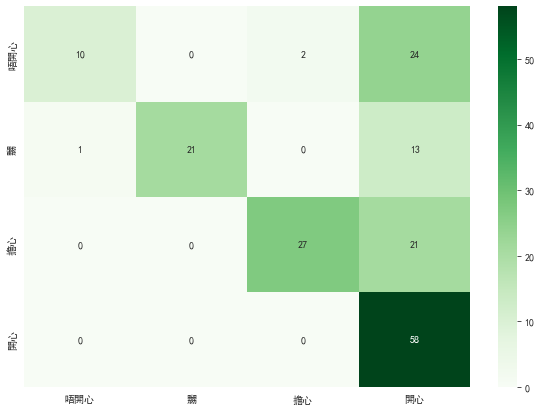

In [40]:
#plot confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

cm = metrics.confusion_matrix(targets, outputs)

# df_cm = pd.DataFrame(cm, index = ["嬲", "擔心", "開心", "唔開心"], columns = ["嬲", "擔心", "開心", "唔開心"])
df_cm = pd.DataFrame(cm, index = [ "唔開心", "嬲", "擔心", "開心"], columns = ["唔開心", "嬲", "擔心", "開心"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='Greens', fmt='g')